# Solution to the STDP coding question
### Written by Claudia Clopath, translated to python by Tom George 

Text(0, 0.5, 'weight change')

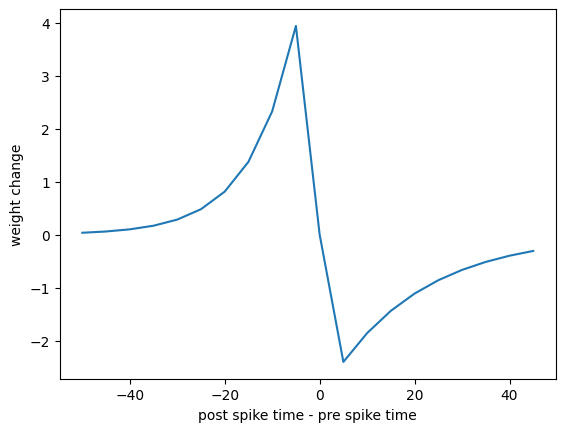

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 

dt = 1          # Euleur integration time step [ms]
p = 60          # number of pairings
rep = 1000      # time between the pairing [ms], i.e. 1Hz

# parameters STDP
tau_plus = 10  # LTP time constant [ms]
tau_minus = 20 # LTD time constant [ms]
A_plus = 1    # LTP learning rate or amplitude
A_minus = 1   # LTD learning rate or amplitude

lag_range = np.arange(-50,50,5) # simulate for different lags between the pre and post spikes
dw_range = np.zeros(len(lag_range)) # save weight changes
count = 0 # counter

for lag in lag_range:
    # Init
    T = rep*(p-1)+2*abs(lag)+1
     # spiketrain total time length
    pre_spikes = np.zeros(T)# presynaptic spiketrain
    post_spikes = np.zeros(T)# postsynaptic spiketrain
    pre_spikes[lag+abs(lag)+1:lag+abs(lag)+T:rep] = 1
    # pre_spikes[lag+abs(lag)+1:rep:lag+abs(lag)+T) = 1  # presynaptic spiketrain (0  if not spike, 1 if spike)
    post_spikes[abs(lag)+1:abs(lag)+T:rep] = 1
    # post_spikes(abs(lag)+1:rep:T+abs(lag)) = 1  # postsynaptic spiketrain (0  if not spike, 1 if spike)
    x = np.zeros(T)   # presynaptic trace
    y = np.zeros(T)   # postsynaptic trace
    dw = 0         # synaptic weight change
    
    # time iterations
    for t in range(T-1):
        x[t+1] = x[t] + dt*(-x[t]+pre_spikes[t])/tau_plus            # pre-synaptic trace update
        y[t+1] = y[t] + dt*(-y[t]+post_spikes[t])/tau_minus           # post-synaptic trace update
        dw = dw + (A_plus*x[t]*post_spikes[t] - A_minus*y[t]*pre_spikes[t])     # weights update
    
    dw_range[count] = dw
    count += 1 # update a counter


fig, ax = plt.subplots()
ax.plot(lag_range, dw_range)
ax.set_xlabel('post spike time - pre spike time')
ax.set_ylabel('weight change')